In [1]:
# importing necessary libraries and pakages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import cross_val_score,KFold
import geopandas as gp
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV,cross_val_score,KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
import category_encoders as ce
import xgboost
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')
sb.set()

In [2]:
# loading COVID-19 data
ds1 = pd.read_csv('worldometer_snapshots_April18_to_May18.csv')
ds1

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [3]:
# loading country wise fraction age data
ds2 = pd.read_csv('population_structure_by_age_per_contry.csv')
ds2

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [4]:
# merging two data set for combined analysis
ds = pd.merge( ds1 , ds2, left_on = 'Country', right_on = 'Country', how = 'inner')

In [5]:
ds

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154
...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-14,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN
6599,2020-05-15,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN
6600,2020-05-16,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN
6601,2020-05-17,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN


### EDA and Data-preprocessing

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6603 entries, 0 to 6602
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      6603 non-null   object 
 1   Country                   6603 non-null   object 
 2   Population                6603 non-null   int64  
 3   Total Tests               5505 non-null   float64
 4   Total Cases               6554 non-null   float64
 5   Total Deaths              5367 non-null   float64
 6   Total Recovered           6318 non-null   float64
 7   Serious or Critical       4117 non-null   float64
 8   Active Cases              6544 non-null   float64
 9   Fraction age 0-14 years   5456 non-null   float64
 10  Fraction age 15-64 years  5456 non-null   float64
 11  Fraction age 65+ years    5456 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 670.6+ KB


In [7]:
ds.isnull().sum()

Date                           0
Country                        0
Population                     0
Total Tests                 1098
Total Cases                   49
Total Deaths                1236
Total Recovered              285
Serious or Critical         2486
Active Cases                  59
Fraction age 0-14 years     1147
Fraction age 15-64 years    1147
Fraction age 65+ years      1147
dtype: int64

In [8]:
# defining function to change a column date information into year, month and weekday.
def to_date_time(col, df):
    df[col] = pd.to_datetime(df[col], infer_datetime_format = True)
        
    if len(df[col].dt.year.unique()) != 1:
        df[col+'(year)'] = df[col].dt.year
    else:
        pass
    if len(df[col].dt.month.unique()) != 1:
        df[col+'(month)'] = df[col].dt.month
        
        month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
        df[col+'(month)'] = df[col+'(month)'].map(month_map)
    
    else:
        pass
    if len(df[col].dt.dayofweek.unique()) != 1:
        df[col+'(weekday)'] = df[col].dt.dayofweek
        
        weekday_map = {6:'SUN', 5:'SAT', 4:'FRI', 3:'THU', 2:'WED', 1:'TUE', 0: 'MON'}
        df[col+'(weekday)'] = df[col+'(weekday)'].map(weekday_map)
        
        
    df.drop([col], 1, inplace = True)
    
    return df       

In [9]:
to_date_time('Date',ds)

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Date(month),Date(weekday)
0,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154,Apr,SAT
1,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154,Apr,SUN
2,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154,Apr,MON
3,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154,Apr,TUE
4,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154,Apr,WED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,May,THU
6599,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,May,FRI
6600,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,May,SAT
6601,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,May,SUN


In [10]:
# creating new column 'per_capita_total_case' 
ds['per_capita_total_case'] = ds['Total Cases']/ds['Population']

In [11]:
# separating numeric and categoric columns are separate analysis
cat = []
numeric = []

for col in ds.columns:
    if str(ds[col].dtype) == 'object':
        cat.append(col)
    else:
        numeric.append(col)   

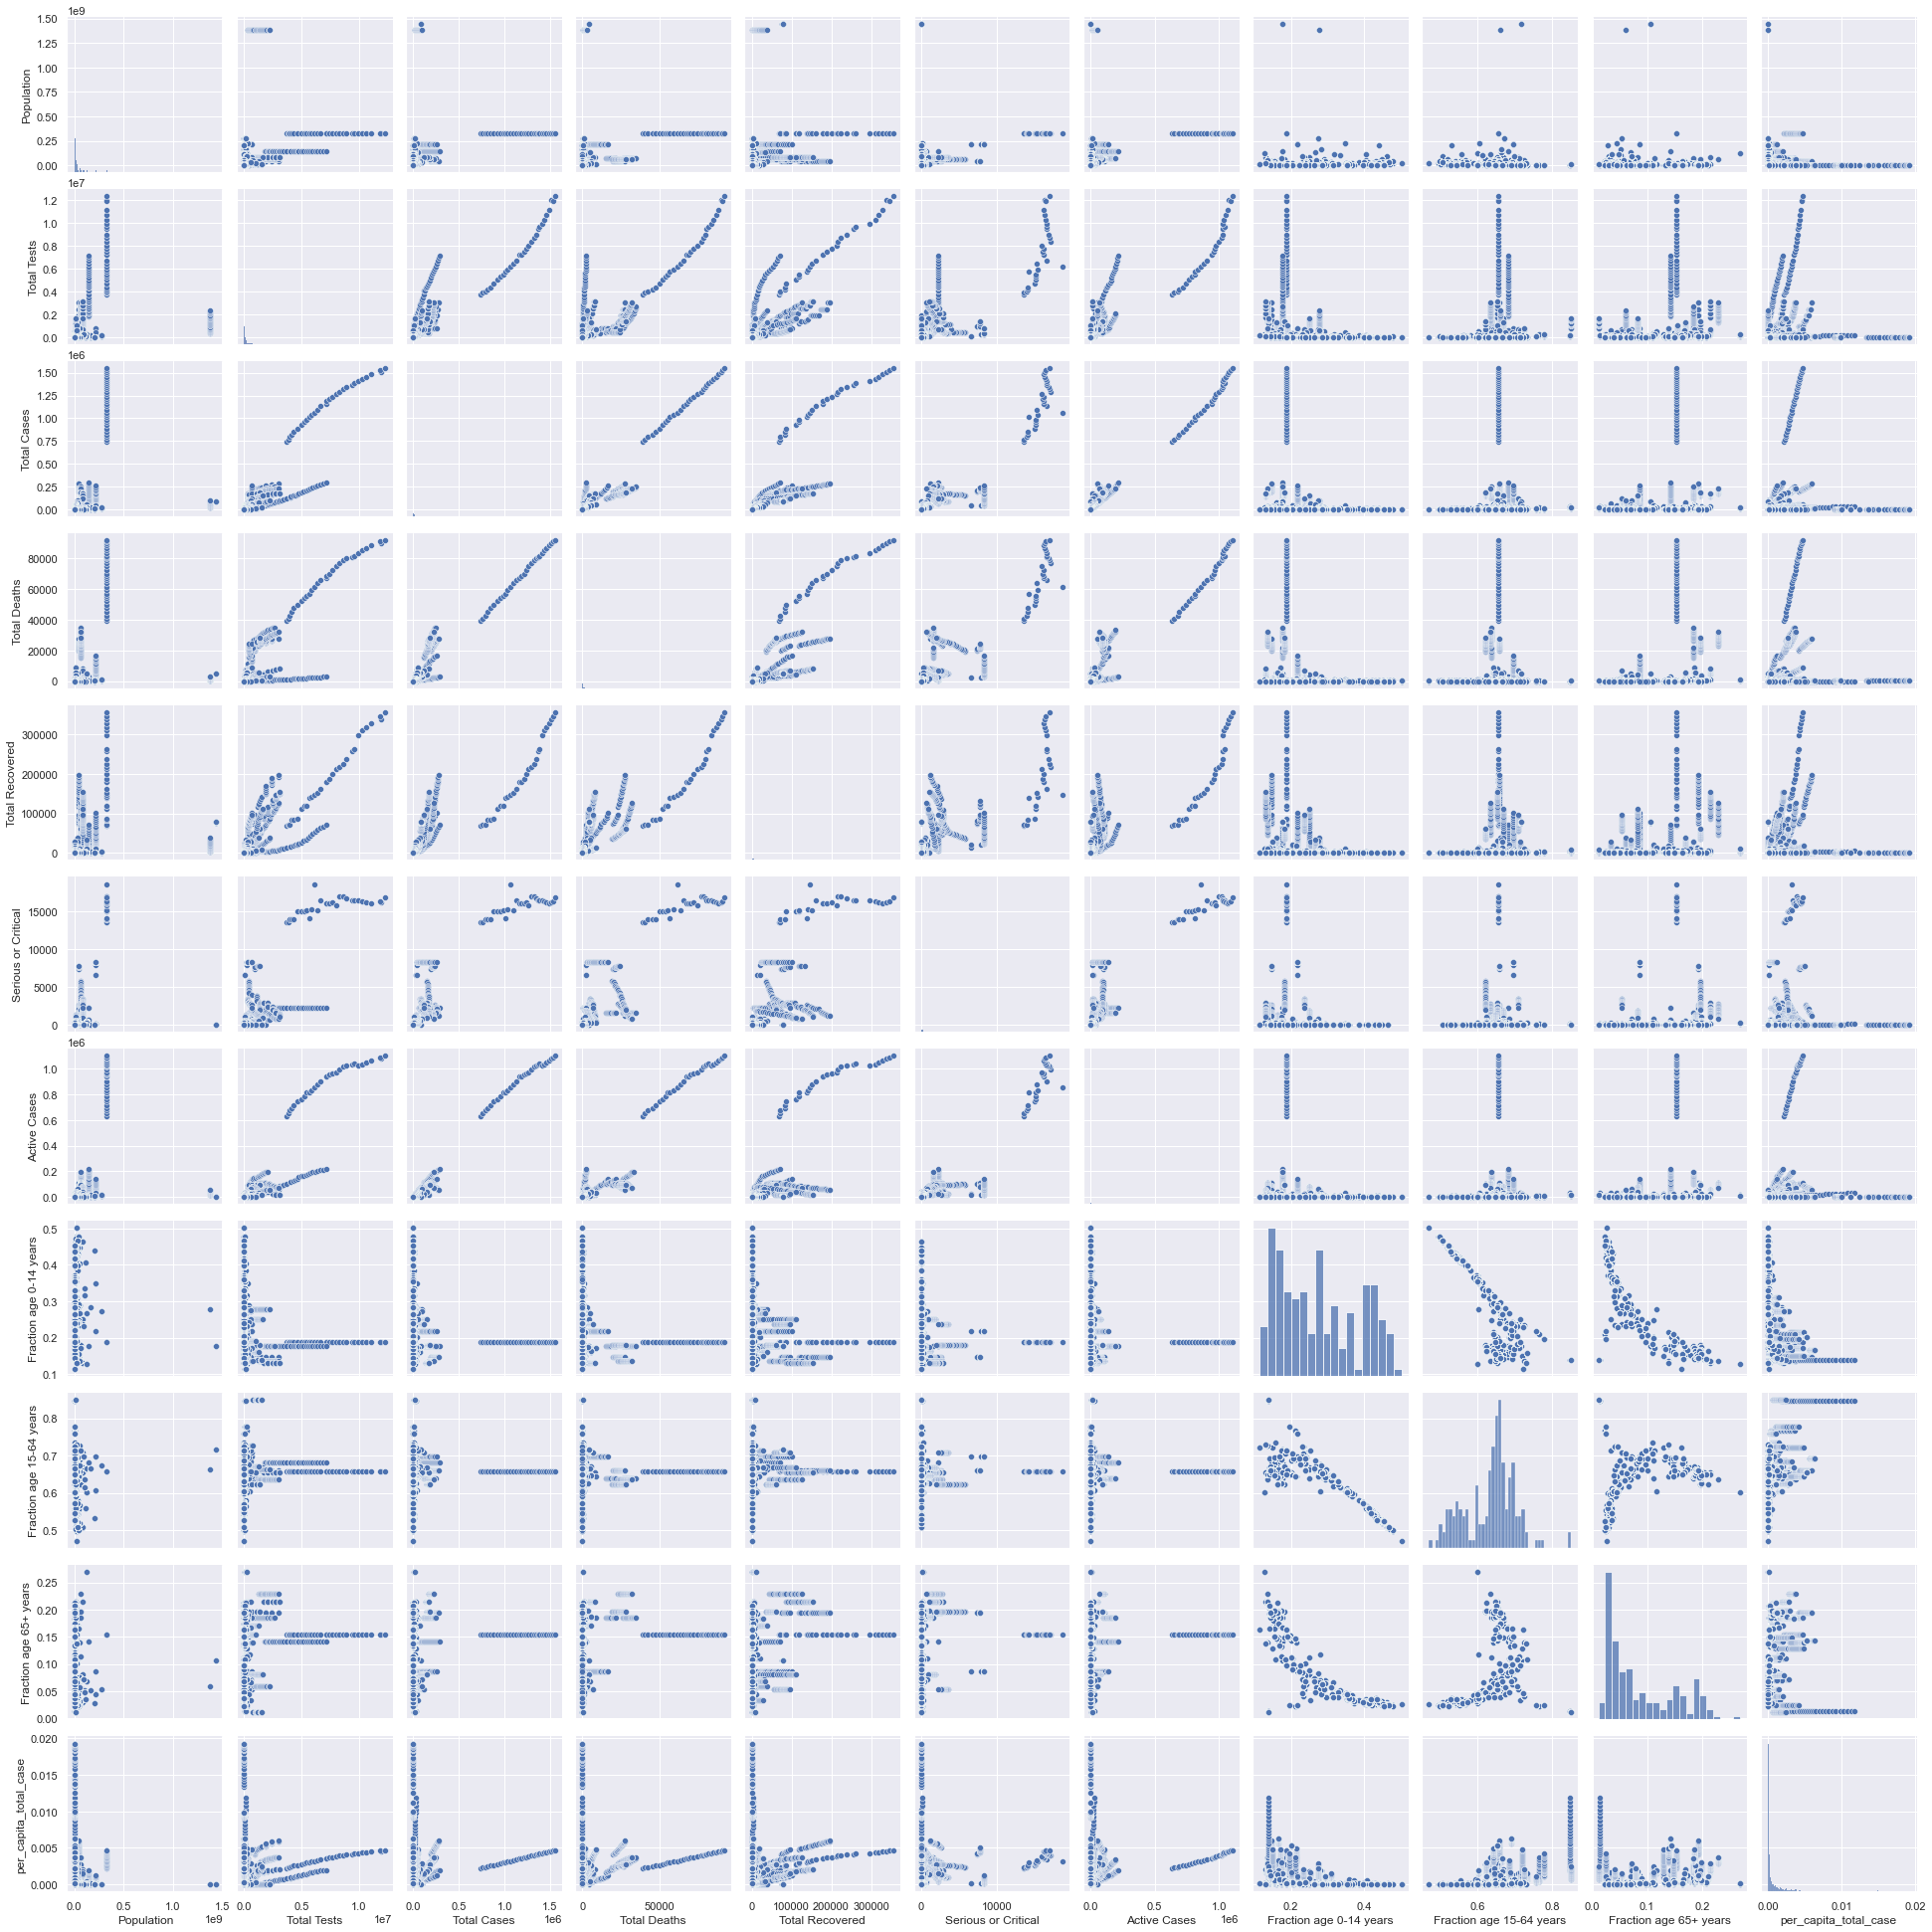

In [13]:
sb.pairplot(ds[numeric])
plt.show()

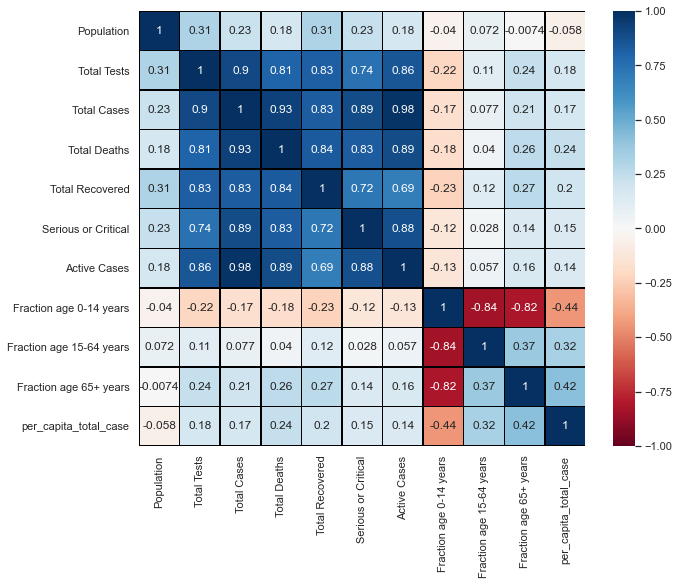

In [14]:
plt.figure(figsize = (10,8))
sb.heatmap(ds[numeric].corr(), cmap = 'RdBu', vmin = -1, vmax = 1,
                           center = 0, linewidth = 0.5, linecolor = 'black', annot = True)
plt.show()

From above pairplot and heatmap we see that, columns pertaining to certain cases (like-Total, Total Deaths, Total Recovered, Serious/critical, Active) are correlated to each other, also, total death cases are highly dependant on total cases and active cases.

Also, we can see that, total deaths is not directly correlated with the population of that country.

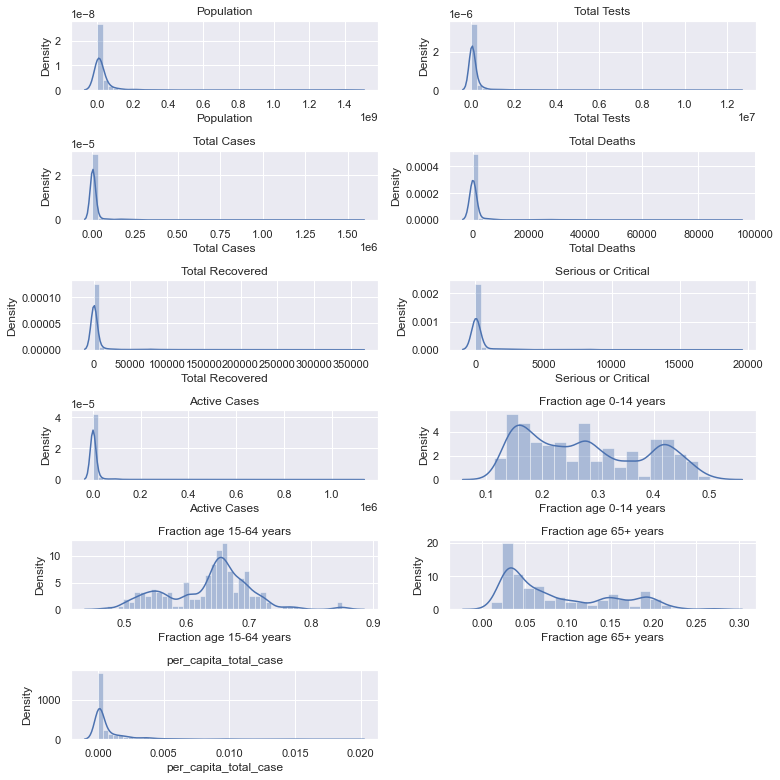

In [15]:
for i,col in enumerate(numeric):
    plt.subplot(6,2 ,i+1)
    sb.distplot(ds[col])
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(11, 11)
    plt.tight_layout()
plt.show()

From a bove distplot, we see that most of the distribution is right skewed.

In [12]:
numeric

['Population',
 'Total Tests',
 'Total Cases',
 'Total Deaths',
 'Total Recovered',
 'Serious or Critical',
 'Active Cases',
 'Fraction age 0-14 years',
 'Fraction age 15-64 years',
 'Fraction age 65+ years',
 'per_capita_total_case']

In [13]:
# finding total deaths for respective fraction ages.
age_wise_deaths = ds.groupby(numeric[-4:-1])['Total Deaths'].agg(['sum']).sort_values('sum', ascending = False).reset_index()[['Fraction age 0-14 years',
                                                                                           'Fraction age 15-64 years','Fraction age 65+ years','sum']]

In [14]:
age_wise_deaths

,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,sum
0,0.189,0.657,0.154,2102393.0
1,0.135,0.635,0.230,881699.0
2,0.177,0.638,0.185,825478.0
3,0.147,0.659,0.194,767305.0
4,0.181,0.622,0.197,761760.0
...,...,...,...,...
169,0.354,0.601,0.045,0.0
170,0.359,0.603,0.038,0.0
171,0.401,0.569,0.030,0.0
172,0.367,0.598,0.036,0.0


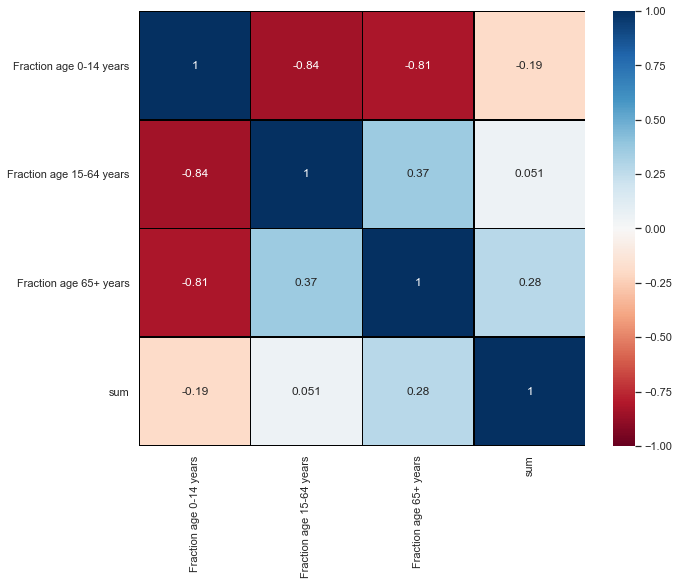

In [15]:
plt.figure(figsize = (10,8))
sb.heatmap(age_wise_deaths.corr(), cmap = 'RdBu', vmin = -1, vmax = 1,
                           center = 0, linewidth = 0.5, linecolor = 'black', annot = True)
plt.show()

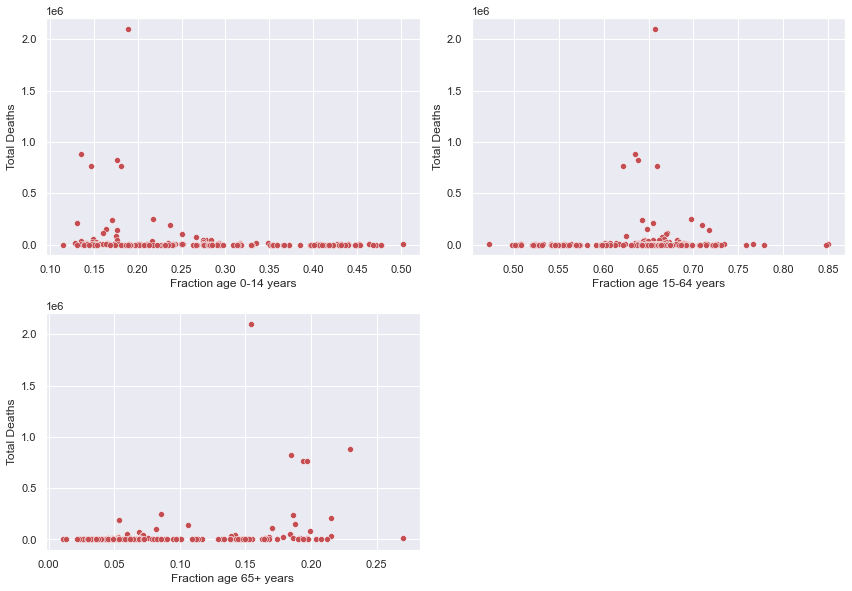

In [16]:
for i, col in enumerate(numeric[-4:-1]):
    
    plt.subplot(3,2, i+1)
    sb.scatterplot(x =  col , y = 'sum', data =  age_wise_deaths , color = 'r'
              )
    
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12,12)
    plt.ylabel('Total Deaths', fontsize = 12)
    plt.tight_layout()
plt.show()

From above scatterplots, we see that, for certain percentages of age groups, there are
outliers/extreme values of total deaths for different age fraction.

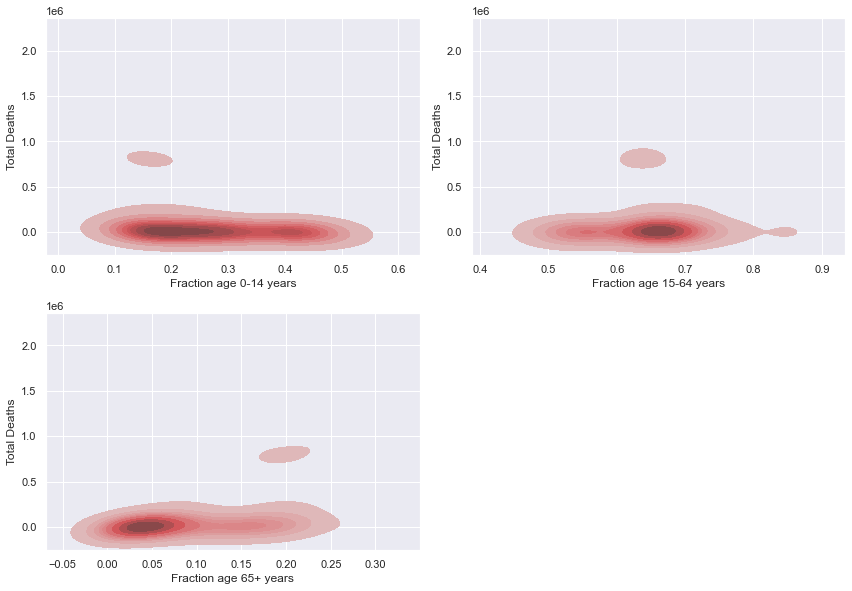

In [17]:
for i, col in enumerate(numeric[-4:-1]):
    
    plt.subplot(3,2, i+1)
    sb.kdeplot(x =  col , y = 'sum', data =  age_wise_deaths ,fill = True, color = 'r'
              )
    
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12,12)
    plt.ylabel('Total Deaths', fontsize = 12)
    plt.tight_layout()
plt.show()

From above bivariate density plots, we can infer that:

Close to 20 % of age group (0-14 years) around the world, are likely to have maximum  deaths.

Between 60-70 % of age group (15-64 years) around the world, are  likely to have maximum  deaths.

And,between 0-5 % of age group (65+ years) around the world, are  likely to have maximum  deaths,having said that, it is also worth noting that, this group is least common compared to other age groups.
    
Therefore, age group between 15-64 years of age, as being most common group and therefore is most vulnerable and most likely to die from the disease.

In [18]:
ds

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Date(month),Date(weekday),per_capita_total_case
0,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154,Apr,SAT,0.002234
1,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154,Apr,SUN,0.002309
2,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154,Apr,MON,0.002397
3,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154,Apr,TUE,0.002475
4,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154,Apr,WED,0.002566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,May,THU,0.000173
6599,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,May,FRI,0.000173
6600,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,May,SAT,0.000173
6601,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,May,SUN,0.000173


In [19]:
# finding total deaths for respective countries
country_wise_deaths = ds.groupby('Country')['Total Deaths'].agg(['sum']).sort_values('sum', ascending = False)

In [20]:
country_wise_deaths

,sum
Country,
USA,2102393.0
Italy,881699.0
UK,825478.0
Spain,767305.0
France,761760.0
...,...
Falkland Islands,0.0
Fiji,0.0
French Polynesia,0.0


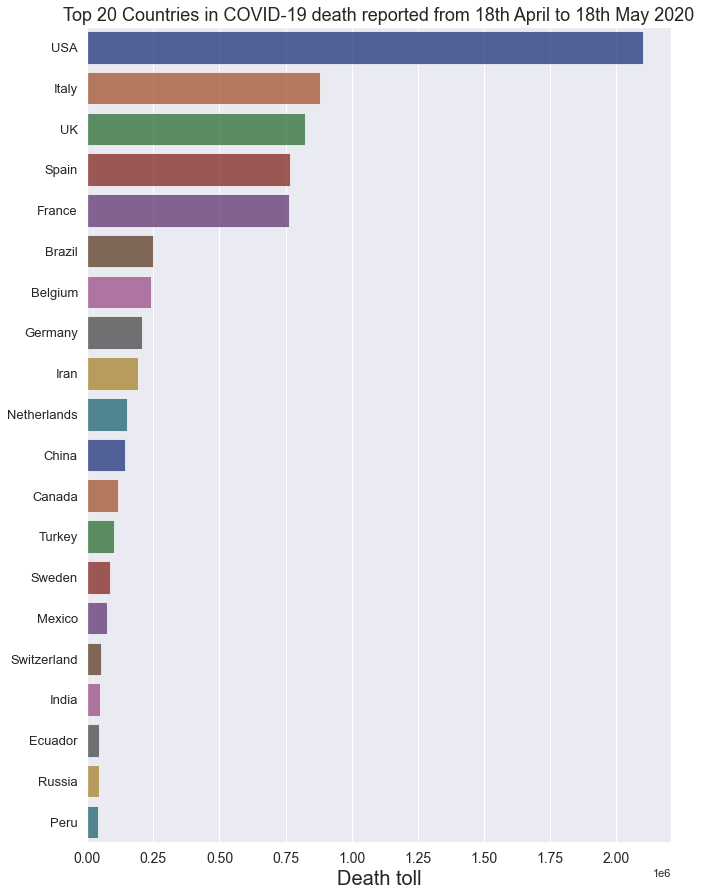

In [21]:
plt.figure(figsize = (23,15))


df = country_wise_deaths.reset_index()[['Country','sum']].head(20)

plt.subplot(1,2,1)
sb.barplot(x = 'sum' , y = 'Country' ,data = df
           ,palette= 'dark', alpha = 0.7)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 13)
plt.ylabel('')
plt.xlabel('Death toll' , fontsize = 20)
plt.title('Top 20 Countries in COVID-19 death reported from 18th April to 18th May 2020', fontsize = 18 )
plt.show()

From above chart, we see that USA has highest death trolls, which is even higher then twice the death toll in Italy (2nd highest).

We see after USA, top 4 countries are from Europe having highest death toll.

Although, the virus reportedly originated from China, it is having Death toll significantly less then that of USA and European Countries. 

In [25]:
world_map_df = gp.read_file(r"C:\Users\91743\World_Countries_shp_file\World_Countries.shp")

In [26]:
world_map_df

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"POLYGON ((34.21807 9.96458, 34.20722 9.90500, ..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ..."
250,Curacao (Netherlands),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


In [221]:
world_map = world_map_df.copy()

In [222]:
world_map['COUNTRY'].replace({"United States": "USA","United Kingdom": "UK"}, inplace = True)

In [223]:
geo_data = pd.merge( world_map, country_wise_deaths , 
                    left_on = 'COUNTRY', right_on = 'Country', how = 'inner')

In [225]:
type(geo_data)

geopandas.geodataframe.GeoDataFrame

In [226]:
geo_data.set_index('COUNTRY', inplace = True)

In [227]:
geo_data.to_crs(epsg = 3857, inplace = True)

In [219]:
geo_data.loc['Congo']

geometry    POLYGON ((15.89050483703613 -3.943009376525879...
sum                                                       290
Name: Congo, dtype: object

No handles with labels found to put in legend.


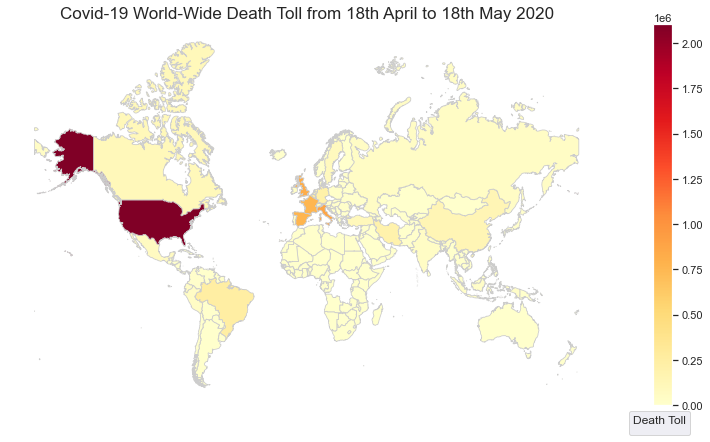

In [238]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis('off')
ax.set_title('Covid-19 World-Wide Death Toll from 18th April to 18th May 2020', fontsize = 17)
geo_data.plot(column = 'sum', cmap = 'YlOrRd', 
           linewidth =0.8, 
           edgecolor = '0.8',
           ax = ax,
           legend = True, aspect = 1)
plt.legend(title = 'Death Toll', bbox_to_anchor=(1.15, 0
                                                     ))
fig.set_size_inches(17,7)
plt.show()

From above world map, we see that USA and North-West European Countries have higest death toll, and also it can be seen that Death tolls in China and its neighbouring Countries was comparitively lower then that of USA and North-West European Countries.

In [22]:
# finding total deaths for each month
month_wise_deaths = ds.groupby('Date(month)')['Total Deaths'].agg(['sum']).sort_values('sum', ascending = False)

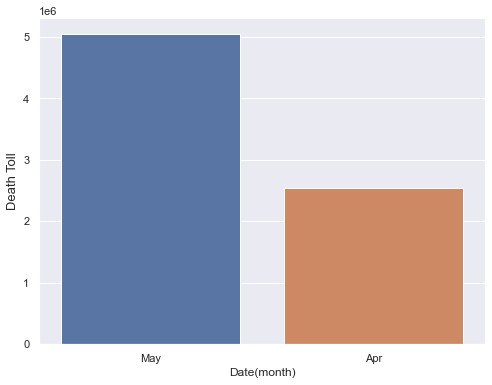

In [23]:
plt.figure(figsize = (8,6))
sb.barplot(y = 'sum', x = month_wise_deaths.index ,data = month_wise_deaths)
plt.ylabel('Death Toll',fontsize = 13)
plt.show()

From, above bar chart, we see that within one month, the World-Wide Death Toll increased by almost double.

In [24]:
# finding weekday wise  total deaths
day_wise_deaths = ds.groupby('Date(weekday)')['Total Deaths'].agg(['sum']).sort_values('sum', ascending = False)

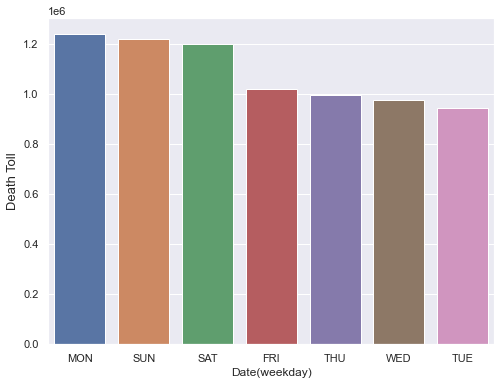

In [25]:
plt.figure(figsize = (8,6))
sb.barplot(y = 'sum', x = day_wise_deaths.index ,data = day_wise_deaths)
plt.ylabel('Death Toll',fontsize = 13)
plt.show()

From above plot, we can see that most of the deaths, occured during Weekends and Mondays.

In [26]:
ds.isnull().sum()

Country                        0
Population                     0
Total Tests                 1098
Total Cases                   49
Total Deaths                1236
Total Recovered              285
Serious or Critical         2486
Active Cases                  59
Fraction age 0-14 years     1147
Fraction age 15-64 years    1147
Fraction age 65+ years      1147
Date(month)                    0
Date(weekday)                  0
per_capita_total_case         49
dtype: int64

In [27]:
# imputing missing values
for col in numeric:
    if ds[col].isnull().sum() > 0:
        ds[col] = ds.groupby(['Date(month)','Date(weekday)'])[col].transform(lambda x: x.fillna(x.median()))   

In [28]:
ds.isnull().sum()

Country                     0
Population                  0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
Date(month)                 0
Date(weekday)               0
per_capita_total_case       0
dtype: int64

In [29]:
numeric.remove('Total Deaths')

In [73]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(ds.drop(['Total Deaths'], 1), 
                                                    ds['Total Deaths'],
                                                    test_size = 0.30, random_state = 42) 

In [74]:
# target/mean encoding with tuned smoothing value. 
for col in ['Date(weekday)','Country'] :
    
        encoder = ce.TargetEncoder()
        x_train[col] = encoder.fit_transform(x_train[col], y_train)
        x_test[col] = encoder.transform(x_test[col])

In [75]:
# dummy encoding 
x_train = pd.get_dummies(data = x_train, prefix = 'Date(month)', columns = ['Date(month)'],drop_first = True )
x_test = pd.get_dummies(data = x_test, prefix = 'Date(month)', columns = ['Date(month)'],drop_first = True )

In [76]:
# robust scaling all numeric features.
for col in numeric:
    
    scaler = RobustScaler()
    x_train[col] = scaler.fit_transform(x_train[col].values.reshape(-1,1))
    x_test[col] = scaler.transform(x_test[col].values.reshape(-1,1))

In [77]:
k =  KFold(n_splits = 10)

### Base Model Evaluation

model: RandomForestRegressor()
CV score:0.9987196959589604
score_std: 0.0008412529406611216
----------
model: LinearRegression(normalize=True)
CV score:0.970004216543501
score_std: 0.017180653238189538
----------
model: SVR()
CV score:-0.020873108281163642
score_std: 0.00703703337013122
----------
model: AdaBoostRegressor()
CV score:0.8447660139641295
score_std: 0.07294342059247241
----------
model: GradientBoostingRegressor()
CV score:0.9979283010235962
score_std: 0.0009148747033089358
----------
model: KNeighborsRegressor()
CV score:0.9850434580995842
score_std: 0.007293835005515373
----------
model: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators

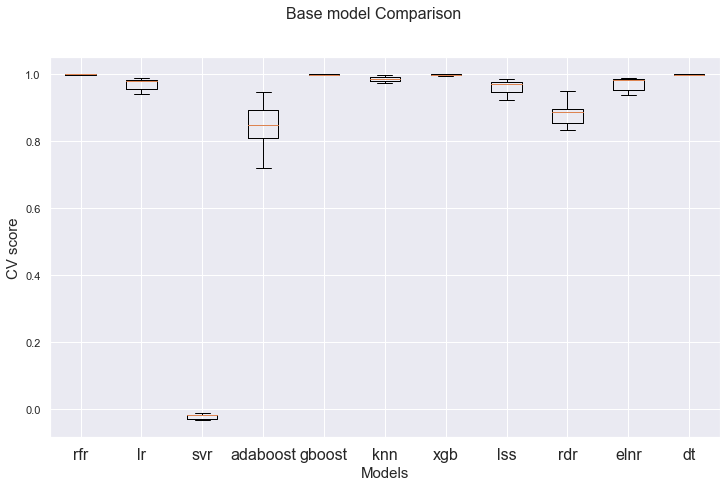

In [78]:
# inilializing different models
rfr = RandomForestRegressor()
svr = SVR()
lr = LinearRegression(normalize = True)
adaboost =  AdaBoostRegressor()
gboost = GradientBoostingRegressor()
knn = KNeighborsRegressor()
xgb = xgboost.XGBRegressor()
lss = Lasso(normalize = True)
rdr = Ridge(normalize = True)
elnr = ElasticNet()
dt = DecisionTreeRegressor()

models = [rfr, lr, svr, adaboost, gboost, knn, xgb, lss, rdr, elnr, dt]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train, y_train, cv = k, scoring = 'r2', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 16)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rfr', 'lr','svr', 'adaboost', 'gboost', 'knn', 'xgb','lss','rdr','elnr','dt'],
                  fontsize = 16)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('CV score', fontsize = 15)
fig.set_size_inches(12,7)
plt.show() 

From the above cross-val-scores, based on mean median and spread of scores, we shall select dt, rfr, gboost and xgb for further tuning.

### Hyper-Parameter tuning

In [79]:

param_dt = dict(splitter = ['best', 'random'], criterion = ['mse', 'friedman_mse', 'mae'],
                max_depth = [3,4,5,6,7,8,None],min_samples_split = [2,3,4],
                min_samples_leaf = [1,2,3], random_state = [40,41,42,43,44]
                )

param_rfr = dict(n_estimators = [10,15,20,25,30], criterion = ['mse', 'mae'],
                max_depth = [3,4,5,6,7,None],min_samples_split = [2,3,4],
                min_samples_leaf = [1,2,3], random_state = [40,41,42,43,44])

param_gboost =  dict(
    learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.5],
    max_depth = [ 2,3, 4, 5, 6,7, 8],
    n_estimators = [100, 150, 200,250,300],
    min_samples_split = [1,2,3], random_state = [40,41,42,43,44],
    alpha = [0.05,0.1,0.5,0.75,1,1.75,2])

param_xgb = dict( learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
     min_child_weight = [ 1, 3, 5, 7 ],
     gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     colsample_bytree = [ 0.3, 0.4, 0.5 , 0.7 ],
     alpha = [0.05,0.1,0.5,0.75,1,1.75,2]
     )

In [80]:
model_param_list = [ (dt,param_dt),
                    (rfr, param_rfr), (gboost, param_gboost), (xgb, param_xgb)]

In [81]:
%%time
best_estimator_list = []
for model, param in model_param_list:
    
    r_search = RandomizedSearchCV(model, param, cv = k, n_jobs = -1, scoring = 'neg_root_mean_squared_error',
                                 random_state = 42)
    
    r_search.fit(x_train, y_train)
    best_cvscore = r_search.best_score_
    best_param = r_search.best_params_
    best_estimator = r_search.best_estimator_
    best_estimator_list.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_param:', best_param)
    print('\n')
print('best_estimators:',best_estimator_list)

model: DecisionTreeRegressor()
best_cvscore: -280.8364308354627
best_param: {'splitter': 'best', 'random_state': 42, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 8, 'criterion': 'mae'}


model: RandomForestRegressor()
best_cvscore: -206.2392630614335
best_param: {'random_state': 40, 'n_estimators': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'mse'}


model: GradientBoostingRegressor()
best_cvscore: -187.27444196669268
best_param: {'random_state': 40, 'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 6, 'learning_rate': 0.1, 'alpha': 0.05}


model: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_esti

### Testing

In [82]:
# testing for train data

print('*******TRAIN RESULTS*******')
print('\n')

for model in best_estimator_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    score = r2_score(y_train, y_pred)
    print('model',model)
    print('accuracy (r2_score):',  round(score*100,2),'%')
    print('root_mean_squared_error:',mean_squared_error(y_train, y_pred, squared = False))
    print('-------------------------------------------')

*******TRAIN RESULTS*******


model DecisionTreeRegressor(criterion='mae', max_depth=8, min_samples_split=3,
                      random_state=42)
accuracy (r2_score): 99.96 %
root_mean_squared_error: 115.82529679640325
-------------------------------------------
model RandomForestRegressor(n_estimators=15, random_state=40)
accuracy (r2_score): 99.99 %
root_mean_squared_error: 68.55817287702556
-------------------------------------------
model GradientBoostingRegressor(alpha=0.05, max_depth=6, n_estimators=200,
                          random_state=40)
accuracy (r2_score): 100.0 %
root_mean_squared_error: 7.256930146843083
-------------------------------------------
model XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=12,
             min_child_weight=3,

In [83]:
#testing for test data
print('*******TEST RESULTS*******')
print('\n')
for model in best_estimator_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)
    print('model',model)
    print('accuracy (r2_score):',  round(score*100,2),'%')
    print('root_mean_squared_error:',mean_squared_error(y_test, y_pred, squared = False))
    print('-------------------------------------------')

*******TEST RESULTS*******


model DecisionTreeRegressor(criterion='mae', max_depth=8, min_samples_split=3,
                      random_state=42)
accuracy (r2_score): 99.84 %
root_mean_squared_error: 254.40176681800216
-------------------------------------------
model RandomForestRegressor(n_estimators=15, random_state=40)
accuracy (r2_score): 99.93 %
root_mean_squared_error: 173.79763884213142
-------------------------------------------
model GradientBoostingRegressor(alpha=0.05, max_depth=6, n_estimators=200,
                          random_state=40)
accuracy (r2_score): 99.94 %
root_mean_squared_error: 161.2152636031355
-------------------------------------------
model XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=12,
             min_child_weight=3,

Based on r2 score and root mean sqaured error from test results, we can select  GradientBoostingRegressor as our regression model for this project.

In [95]:
# selecting best model as GradientBoostingRegressor.
selected_model = GradientBoostingRegressor(alpha=0.05, max_depth=6, n_estimators=200,
                          random_state=40)

selected_model.fit(x_train, y_train)
y_pred = selected_model.predict(x_test)

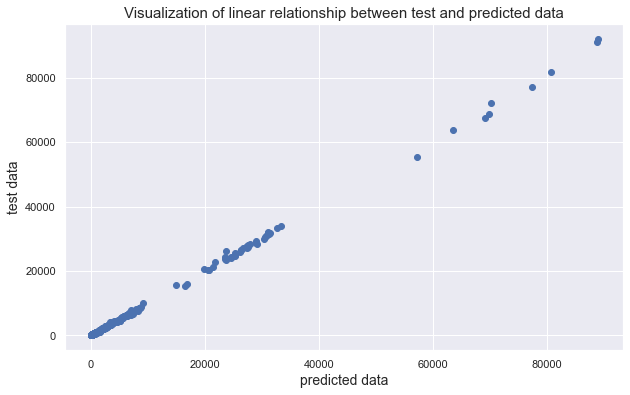

In [96]:
plt.figure(figsize = (10,6))
plt.scatter(y_pred.reshape(-1,1),y_test.values.reshape(-1,1))
plt.xlabel('predicted data', fontsize = 14)
plt.ylabel('test data',  fontsize = 14)
plt.title('Visualization of linear relationship between test and predicted data',fontsize = 15 )
plt.show()

From above scatter plot, we see that, predicted and test data almost follows perfect linear trend, which is a good sign for a regression model.

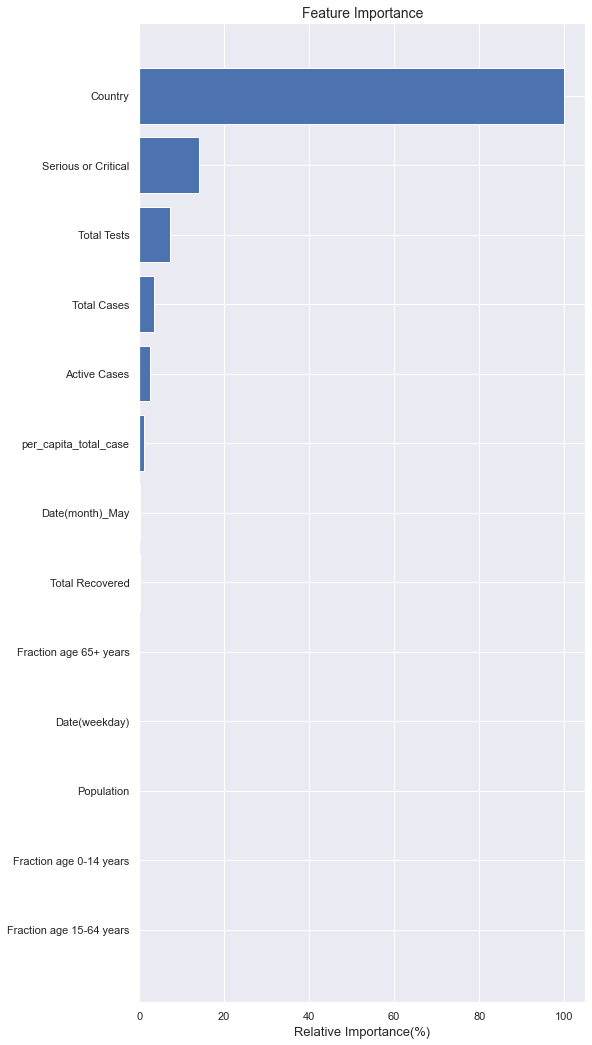

In [97]:
feature_importance = selected_model.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
yl = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(8, 18))
plt.barh(yl, feature_importance[sorted_idx], align='center')
plt.yticks(yl, x_train.keys()[sorted_idx])
plt.xlabel('Relative Importance(%)',fontsize = 13)
plt.title('Feature Importance',fontsize = 14)
plt.show()

From above, feature importance plot of the selected model, the number of deaths is highly dependant on or may vary with different Countries.

Also, we see total tests is a contributing factor in predicting deaths, in other words, developing proper testing facilities may help identifying the disease for preventing further deaths.

In [98]:
test_df = pd.DataFrame({'Actual Total Deaths':y_test.values,'Predicted Total Deaths':y_pred})

In [99]:
test_df.to_csv('covid_deaths_pred.csv', index = False)
print('Predicted result stored sucessfully.')

Predicted result stored sucessfully.


In [101]:
# Saving the final model as GradientBoostingRegressor.
import joblib

joblib.dump(selected_model, 'covid_deaths_pred.obj')
print('Model successfully saved.')

Model successfully saved.
